<a href="https://colab.research.google.com/github/iratuh/BigDataProject/blob/main/Centrality_UI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚦 Analisis Big Data Geospasial - Aksesibilitas Charging Station Hub UI berdasarkan Graph

Proyek mini untuk analisis spasial jaringan jalan dan aksesibilitas charging station di Universitas Indonesia.

## Tujuan:
- Mengambil jaringan jalan dari Open Street Map (OSM)
- Analisis statistik jaringan
- Analisis centrality
- Analisis aksesibilitas ke pangkalan ojek terdekat (stasiun, halte, dan asrama)
- Visualisasi jaringan dan Point-of-Interest (POI)

Cc: Hutari Andini

In [1]:
# 🔧 Install dependencies
!pip install osmnx --upgrade folium geopandas networkx --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 2.4 MB/s eta 0:00:00


In [2]:
# 📚 Import libraries
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
import pandas as pd

In [3]:
# 🌍 Ambil jaringan jalan Kota Bandung
place = "Universitas Indonesia, Depok"
G = ox.graph_from_place(place, network_type="drive")
nodes, edges = ox.graph_to_gdfs(G)

In [4]:
# 📊 Statistik jaringan
stats = ox.basic_stats(G)
pd.Series(stats).head(10)

,0
n,71
m,127
k_avg,3.577465
edge_length_total,20646.027212
edge_length_avg,162.567143
streets_per_node_avg,2.929577
streets_per_node_counts,"{0: 0, 1: 4, 2: 1, 3: 62, 4: 4}"
streets_per_node_proportions,"{0: 0.0, 1: 0.056338028169014086, 2: 0.0140845..."
intersection_count,67
street_length_total,18788.770492




> From the information we gained above (the explanation below), we can conclude that the connectivity is fairly well-connected, dominance by T-Junction, a walkable and permeable routes, and have  just a few 4-intersections which can concentrate flows into certain streets and create bottlenecks.



*   n = 71 (nodes)
There are 71 nodes, meaning intersections, dead ends, or points where the street geometry is split.

* m = 127 (edges)
The network has 127 edges (street segments). Since the graph is directed, a two-way street usually counts as two edges.

* k_avg = 3.58
The average node degree is about 3.6, meaning each node connects to ~3.6 directed street segments. This shows a fairly connected network—not just cul-de-sacs, but also not a perfect grid.

* edge_length_total ≈ 20,646 m
Total length of all directed edges. Higher because two-way streets are counted twice.

* edge_length_avg ≈ 162.6 m
The average edge length is ~163 meters, which reflects the typical block size or distance between intersections. This is relatively short, suggesting good pedestrian permeability.

* streets_per_node_avg ≈ 2.93
On average, each node connects to about 3 physical streets. This fits with a pattern dominated by T-junctions.

* streets_per_node_counts {1:4, 2:1, 3:62, 4:4}
4 nodes are dead ends (1 street).
1 node is “straight-through” (2 streets).
62 T-junctions (3 streets) → dominant.
4 four-way intersections (4 streets).
This means the street network is heavily shaped by T-junctions, with very few full four-way intersections.

* streets_per_node_proportions
Confirms that ~88% of intersections are T-junctions.

* intersection_count = 67
The number of intersections (nodes with ≥3 streets) is 67. This shows the network is quite dense in intersections.

* street_length_total ≈ 18,789 m
The total physical street length (undirected) is ~18.8 km. This is lower than the edge length total because two-way streets are not double-counted here.



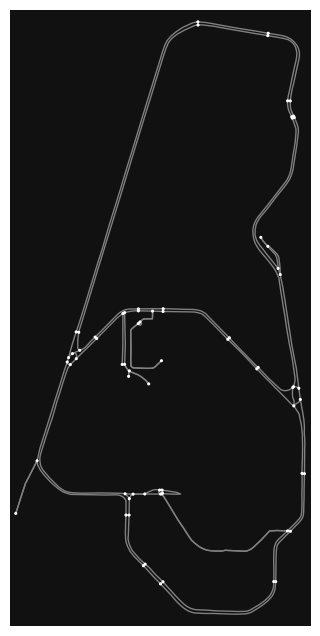

In [5]:
# 🗺️ Visualisasi jaringan
fig, ax = ox.plot_graph(G, node_size=5, edge_color="gray")

**Centraility Analysis**
---
1) Degree: measure total direct connection (edge) that node have. Top node with high degree is a node which has a lot of direct neighbor (connect with a lot of road's segment)
2) Betweenness centrality: measure how often a node is on the shortest way between a pair of node in a graph. A node with high betweenness will have a role as a bridge or flow control point. How often other road will get through the node.
3) Closeness centrality: Measure how close a node with all of others node in the graph, by average shortest distance with other node.



In [6]:
# 📍 Analisis centrality
degree = nx.degree_centrality(G)
nx.set_node_attributes(G, degree, "degree")
top_nodes = sorted(degree.items(), key=lambda x: x[1], reverse=True)[:5]
top_nodes

[(90670515, 0.08571428571428572),
 (8787903241, 0.08571428571428572),
 (5394755180, 0.07142857142857142),
 (6073585072, 0.07142857142857142),
 (6073585079, 0.07142857142857142)]

In [7]:
import osmnx as ox

# Node ID yang ingin kamu lihat
node_ids = [90670515, 8787903241, 5394755180, 6073585072, 6073585079]

# Ambil longitude dan latitude dari node
for node_id in node_ids:
    if node_id in G.nodes:
        lat = G.nodes[node_id]['y']
        lon = G.nodes[node_id]['x']
        print(f"Node {node_id}: Latitude={lat}, Longitude={lon}")
    else:
        print(f"Node {node_id} not found in graph.")

Node 90670515: Latitude=-6.3683125, Longitude=106.8314778
Node 8787903241: Latitude=-6.3619557, Longitude=106.8251578
Node 5394755180: Latitude=-6.3616973, Longitude=106.8249711
Node 6073585072: Latitude=-6.360015, Longitude=106.8255839
Node 6073585079: Latitude=-6.3600796, Longitude=106.825515


In [8]:
import networkx as nx

# Pastikan graf tidak multi dan tidak diarahkan untuk analisis ini
G_undirected = G.to_undirected()

# Betweenness Centrality
betweenness = nx.betweenness_centrality(G_undirected, weight='length', normalized=True)

# Closeness Centrality
closeness = nx.closeness_centrality(G_undirected, distance='length')

# Contoh print hasil untuk 5 node
for node_id in node_ids:
    print(f"Node {node_id}: Betweenness={betweenness.get(node_id, 'N/A')}, Closeness={closeness.get(node_id, 'N/A')}")

Node 90670515: Betweenness=0.13871635610766045, Closeness=0.0007565314322484376
Node 8787903241: Betweenness=0.0567287784679089, Closeness=0.0007898643253026894
Node 5394755180: Betweenness=0.08322981366459627, Closeness=0.0008112729554135363
Node 6073585072: Betweenness=0.056314699792960665, Closeness=0.00088212136690346
Node 6073585079: Betweenness=0.02857142857142857, Closeness=0.000874393382161052


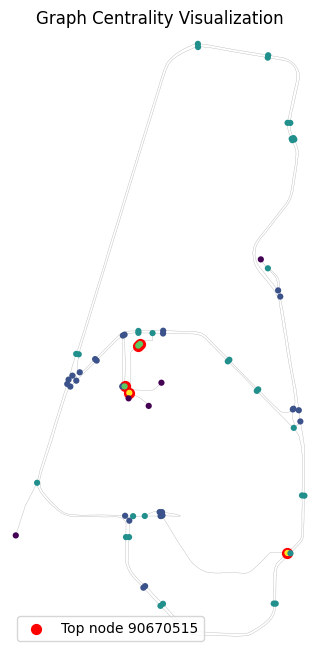

In [9]:
import matplotlib.pyplot as plt

# Kamu bisa pilih salah satu dari centrality metric untuk divisualisasikan
node_centrality = degree  # atau closeness

# Buat list warna berdasarkan nilai centrality
nc_values = [node_centrality.get(node, 0) for node in G_undirected.nodes]

# Visualisasikan graf dengan centrality sebagai warna node
fig, ax = ox.plot_graph(G_undirected, node_color=nc_values, node_size=20, node_zorder=2, edge_linewidth=0.2, edge_color="#999999", bgcolor="white", show=False, close=False)

# Tandai node paling tinggi centrality-nya
top_nodes = sorted(node_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for node_id, centrality_val in top_nodes:
    x, y = G.nodes[node_id]['x'], G.nodes[node_id]['y']
    ax.scatter(x, y, c='red', s=50, label=f"Top node {node_id}" if node_id == top_nodes[0][0] else None)

plt.legend()
plt.title("Graph Centrality Visualization")
plt.show()

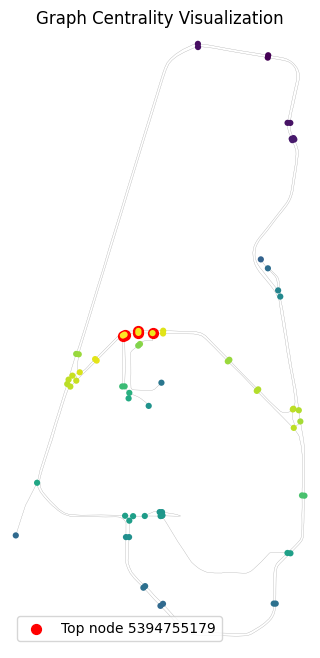

In [18]:
import matplotlib.pyplot as plt

# Kamu bisa pilih salah satu dari centrality metric untuk divisualisasikan
node_centrality = closeness

# Buat list warna berdasarkan nilai centrality
nc_values = [node_centrality.get(node, 0) for node in G_undirected.nodes]

# Visualisasikan graf dengan centrality sebagai warna node
fig, ax = ox.plot_graph(G_undirected, node_color=nc_values, node_size=20, node_zorder=2, edge_linewidth=0.2, edge_color="#999999", bgcolor="white", show=False, close=False)

# Tandai node paling tinggi centrality-nya
top_nodes = sorted(node_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for node_id, centrality_val in top_nodes:
    x, y = G.nodes[node_id]['x'], G.nodes[node_id]['y']
    ax.scatter(x, y, c='red', s=50, label=f"Top node {node_id}" if node_id == top_nodes[0][0] else None)

plt.legend()
plt.title("Graph Centrality Visualization")
plt.show()

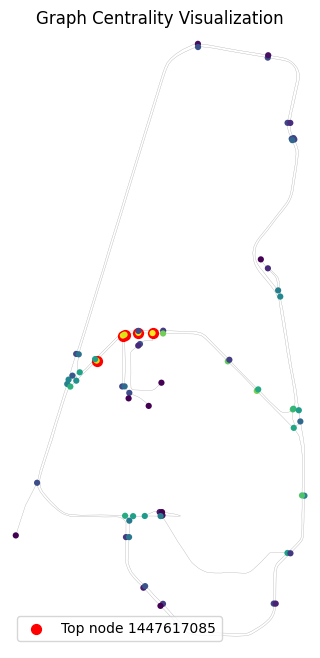

In [19]:
import matplotlib.pyplot as plt

# Kamu bisa pilih salah satu dari centrality metric untuk divisualisasikan
node_centrality = betweenness

# Buat list warna berdasarkan nilai centrality
nc_values = [node_centrality.get(node, 0) for node in G_undirected.nodes]

# Visualisasikan graf dengan centrality sebagai warna node
fig, ax = ox.plot_graph(G_undirected, node_color=nc_values, node_size=20, node_zorder=2, edge_linewidth=0.2, edge_color="#999999", bgcolor="white", show=False, close=False)

# Tandai node paling tinggi centrality-nya
top_nodes = sorted(node_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for node_id, centrality_val in top_nodes:
    x, y = G.nodes[node_id]['x'], G.nodes[node_id]['y']
    ax.scatter(x, y, c='red', s=50, label=f"Top node {node_id}" if node_id == top_nodes[0][0] else None)

plt.legend()
plt.title("Graph Centrality Visualization")
plt.show()

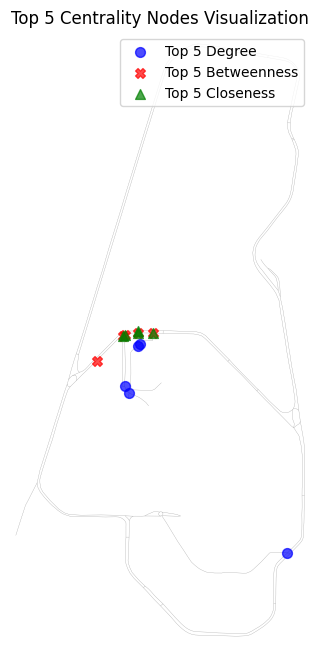

In [25]:
import matplotlib.pyplot as plt
import networkx as nx

# Hitung semua metrik centrality (pastikan G dan G_undirected sudah terdefinisi dari sel sebelumnya)
# degree = nx.degree_centrality(G) # Diasumsikan sudah dihitung
# betweenness = nx.betweenness_centrality(G_undirected, weight='length', normalized=True) # Diasumsikan sudah dihitung
# closeness = nx.closeness_centrality(G_undirected, distance='length') # Diasumsikan sudah dihitung


# Ambil top N node untuk setiap metrik (misal top 5)
N = 5
top_degree_nodes = sorted(degree.items(), key=lambda x: x[1], reverse=True)[:N]
top_betweenness_nodes = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:N]
top_closeness_nodes = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:N]

# Visualisasikan graf dasar
# Gunakan G_undirected untuk konsistensi visualisasi centrality yang dihitung pada G_undirected
fig, ax = ox.plot_graph(G_undirected, node_size=0, edge_linewidth=0.2, edge_color="#999999", bgcolor="white", show=False, close=False)

# Tandai node teratas dari setiap metrik dengan warna/marker berbeda
# Perhatikan bahwa node yang sama mungkin muncul di beberapa daftar top node
node_size = 50

# Top Degree Nodes (Biru)
for node_id, centrality_val in top_degree_nodes:
    x, y = G.nodes[node_id]['x'], G.nodes[node_id]['y'] # Gunakan G untuk koordinat asli
    ax.scatter(x, y, c='blue', s=node_size, label=f'Top {N} Degree' if node_id == top_degree_nodes[0][0] else "", marker='o', alpha=0.7)

# Top Betweenness Nodes (Merah)
for node_id, centrality_val in top_betweenness_nodes:
    x, y = G.nodes[node_id]['x'], G.nodes[node_id]['y']
    ax.scatter(x, y, c='red', s=node_size, label=f'Top {N} Betweenness' if node_id == top_betweenness_nodes[0][0] else "", marker='X', alpha=0.7)

# Top Closeness Nodes (Hijau)
for node_id, centrality_val in top_closeness_nodes:
    x, y = G.nodes[node_id]['x'], G.nodes[node_id]['y']
    ax.scatter(x, y, c='green', s=node_size, label=f'Top {N} Closeness' if node_id == top_closeness_nodes[0][0] else "", marker='^', alpha=0.7)


plt.legend()
plt.title(f"Top {N} Centrality Nodes Visualization")
plt.show()

Node terdekat dengan Stasiun KRL Universitas Indonesia (ID): 1641112272

Distribusi jarak dari Stasiun KRL Universitas Indonesia ke Semua Titik Jaringan:


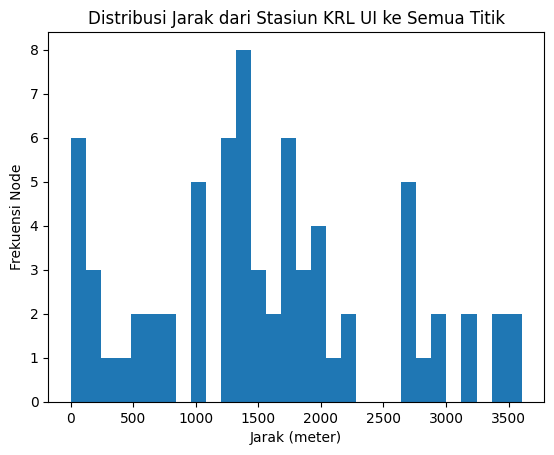

In [26]:
# 📐 Analisis jarak dari Stasiun KRL Universitas Indonesia ke node terdekat
# Pastikan station_points (dari sel sebelumnya) dan G sudah terdefinisi

if 'station_points' in locals() and not station_points.empty and 'G' in locals():
    # Ambil node terdekat untuk Stasiun KRL Universitas Indonesia
    station_points['nearest_node'] = station_points['geometry'].apply(
        lambda point: ox.distance.nearest_nodes(G, point.x, point.y))

    # Ambil node pertama (jika hanya satu stasiun UI yang ditemukan, yang diharapkan dari filter nama sebelumnya)
    source_node = station_points['nearest_node'].iloc[0]
    print(f"Node terdekat dengan Stasiun KRL Universitas Indonesia (ID): {source_node}")

    # Hitung jarak terpendek dari node stasiun ke semua node lain
    # Menggunakan weight='length' untuk menghitung jarak berdasarkan panjang jalan
    lengths = nx.single_source_dijkstra_path_length(G, source_node, weight='length')

    # Tampilkan distribusi jarak
    print("\nDistribusi jarak dari Stasiun KRL Universitas Indonesia ke Semua Titik Jaringan:")
    pd.Series(lengths).plot(kind='hist', bins=30, title='Distribusi Jarak dari Stasiun KRL UI ke Semua Titik')
    plt.xlabel("Jarak (meter)")
    plt.ylabel("Frekuensi Node")
    plt.show()

    # Anda juga bisa melihat jarak ke beberapa node pertama
    # print("\nContoh jarak dari stasiun ke beberapa node lain:")
    # for i, (node_id, dist) in enumerate(lengths.items()):
    #     if i < 10: # tampilkan 10 node pertama
    #         print(f"  Node {node_id}: {dist:.2f} meter")

else:
    print("Pastikan data Stasiun KRL Universitas Indonesia (station_points) dan graf jaringan (G) telah berhasil dimuat dari sel sebelumnya.")

In [28]:
# 🗺️ Peta interaktif jaringan dan rumah sakit
m = folium.Map(location=[-6.9147, 107.6098], zoom_start=12)
for idx, row in station_points.iterrows():
    folium.Marker(location=[row.geometry.y, row.geometry.x], popup="Stasiun").add_to(m)
folium.GeoJson(edges).add_to(m)
m

Custom Node 1 (ID: 10048987772) tidak ditemukan dalam graf.


/tmp/ipython-input-1893541981.py:93: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bus_stop_ft_point = bus_stops.centroid.to_frame(name='geometry').reset_index()
/tmp/ipython-input-1893541981.py:122: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pos_satpam_point = security_gates.centroid.to_frame(name='geometry').reset_index()


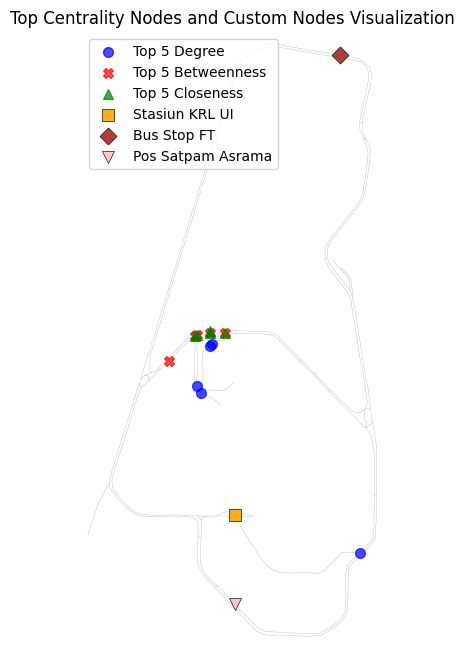

In [29]:
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox

# Salin kode visualisasi dari sel 25 untuk memulai
# Hitung semua metrik centrality (pastikan G dan G_undirected sudah terdefinisi dari sel sebelumnya)
# degree = nx.degree_centrality(G) # Diasumsikan sudah dihitung
# betweenness = nx.betweenness_centrality(G_undirected, weight='length', normalized=True) # Diasumsikan sudah dihitung
# closeness = nx.closeness_centrality(G_undirected, distance='length') # Diasumsikan sudah dihitung


# Ambil top N node untuk setiap metrik (misal top 5)
N = 5
top_degree_nodes = sorted(degree.items(), key=lambda x: x[1], reverse=True)[:N]
top_betweenness_nodes = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:N]
top_closeness_nodes = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:N]

# Visualisasikan graf dasar
fig, ax = ox.plot_graph(G_undirected, node_size=0, edge_linewidth=0.2, edge_color="#999999", bgcolor="white", show=False, close=False)

# Tandai node teratas dari setiap metrik dengan warna/marker berbeda
node_size = 50

# Top Degree Nodes (Biru)
for node_id, centrality_val in top_degree_nodes:
    x, y = G.nodes[node_id]['x'], G.nodes[node_id]['y']
    ax.scatter(x, y, c='blue', s=node_size, label=f'Top {N} Degree' if node_id == top_degree_nodes[0][0] else "", marker='o', alpha=0.7)

# Top Betweenness Nodes (Merah)
for node_id, centrality_val in top_betweenness_nodes:
    x, y = G.nodes[node_id]['x'], G.nodes[node_id]['y']
    ax.scatter(x, y, c='red', s=node_size, label=f'Top {N} Betweenness' if node_id == top_betweenness_nodes[0][0] else "", marker='X', alpha=0.7)

# Top Closeness Nodes (Hijau)
for node_id, centrality_val in top_closeness_nodes:
    x, y = G.nodes[node_id]['x'], G.nodes[node_id]['y']
    ax.scatter(x, y, c='green', s=node_size, label=f'Top {N} Closeness' if node_id == top_closeness_nodes[0][0] else "", marker='^', alpha=0.7)


# --- Tambahkan Node Kustom ---
custom_nodes_info = {
    'node1': {'id': 10048987772, 'label': 'Custom Node 1', 'color': 'purple', 'marker': 'P'}, # Node ID yang Anda berikan
    'node2': {'name': 'Stasiun KRL Universitas Indonesia', 'label': 'Stasiun KRL UI', 'color': 'orange', 'marker': 's'},
    'node3': {'name': 'Bus Stop Fakultas Teknik', 'label': 'Bus Stop FT', 'color': 'brown', 'marker': 'D'},
    'node4': {'name': 'Pos Satpam Asrama', 'label': 'Pos Satpam Asrama', 'color': 'pink', 'marker': 'v'}
}

# Temukan node ID untuk node kustom berdasarkan nama/deskripsi
found_custom_nodes = {}

# Node 1 (ID sudah diketahui)
node_id_1 = custom_nodes_info['node1']['id']
if node_id_1 in G.nodes:
    found_custom_nodes[node_id_1] = custom_nodes_info['node1']
else:
    print(f"Custom Node 1 (ID: {node_id_1}) tidak ditemukan dalam graf.")


# Node 2 (Stasiun KRL UI) - Gunakan data station_points dari sel 14
if 'station_points' in locals() and not station_points.empty:
    # Asumsikan station_points baris pertama adalah Stasiun KRL UI
    stasiun_ui_node_id = station_points['nearest_node'].iloc[0]
    if stasiun_ui_node_id in G.nodes:
         found_custom_nodes[stasiun_ui_node_id] = custom_nodes_info['node2']
    else:
         print(f"Node terdekat untuk Stasiun KRL UI (ID: {stasiun_ui_node_id}) tidak ditemukan dalam graf.")
else:
    print("Data Stasiun KRL Universitas Indonesia (station_points) belum dimuat. Jalankan sel 14 terlebih dahulu.")


# Node 3 (Bus Stop Fakultas Teknik) - Cari berdasarkan tag dan nama
# Mungkin perlu mencoba beberapa tag untuk halte bus
tags_bus_stop = {'highway': 'bus_stop', 'name': 'Bus Stop Fakultas Teknik'}
bus_stops = ox.features_from_place(place, tags=tags_bus_stop)

if bus_stops.empty:
     # Coba tag lain atau cari berdasarkan lokasi perkiraan jika pencarian nama gagal
     print("Tidak ditemukan Bus Stop Fakultas Teknik dengan tag 'highway=bus_stop' dan nama tersebut. Mencari bus stop di dekat Fakultas Teknik...")
     # Anda mungkin perlu koordinat Fakultas Teknik di sini untuk mencari node terdekat
     # Sebagai contoh, kita bisa mencoba mencari semua bus stop di area UI dan memfilter secara manual atau berdasarkan lokasi jika diperlukan.
     tags_bus_stop_general = {'highway': 'bus_stop'}
     all_bus_stops = ox.features_from_place(place, tags=tags_bus_stop_general)
     if not all_bus_stops.empty:
         print(f"Ditemukan {len(all_bus_stops)} halte bus di area ini. Mungkin perlu identifikasi manual 'Bus Stop Fakultas Teknik'.")
         # Jika Anda tahu koordinat Fakultas Teknik, bisa gunakan nearest_nodes dari koordinat tersebut
         # Contoh (perlu koordinat FT): bus_stop_ft_node = ox.distance.nearest_nodes(G, lon_ft, lat_ft)
         # Untuk saat ini, kita lewati penandaan Bus Stop FT jika tidak ditemukan spesifik
         pass # Lewati jika tidak ditemukan
     else:
         print("Tidak ditemukan halte bus sama sekali di area ini.")
else:
    # Jika ditemukan berdasarkan tag dan nama, ambil node terdekat
    bus_stop_ft_point = bus_stops.centroid.to_frame(name='geometry').reset_index()
    bus_stop_ft_point = gpd.GeoDataFrame(bus_stop_ft_point, geometry='geometry', crs=bus_stops.crs)
    bus_stop_ft_node = ox.distance.nearest_nodes(G, bus_stop_ft_point.geometry.iloc[0].x, bus_stop_ft_point.geometry.iloc[0].y)
    if bus_stop_ft_node in G.nodes:
        found_custom_nodes[bus_stop_ft_node] = custom_nodes_info['node3']
    else:
         print(f"Node terdekat untuk Bus Stop Fakultas Teknik (ID: {bus_stop_ft_node}) tidak ditemukan dalam graf.")


# Node 4 (Pos Satpam Asrama) - Cari berdasarkan tag dan nama
# Mungkin perlu mencoba beberapa tag untuk pos satpam atau bangunan/lokasi spesifik
tags_security_gate = {'barrier': 'gate', 'name': 'Pos Satpam Asrama'} # Contoh tag, mungkin berbeda di OSM
security_gates = ox.features_from_place(place, tags=tags_security_gate)

if security_gates.empty:
     print("Tidak ditemukan Pos Satpam Asrama dengan tag 'barrier=gate' dan nama tersebut. Mencari di dekat area asrama...")
     # Mungkin perlu tag lain seperti amenity=security_guard atau building=security
     tags_security_general = {'amenity': 'security_guard'}
     security_points = ox.features_from_place(place, tags=tags_security_general)
     if not security_points.empty:
          print(f"Ditemukan {len(security_points)} titik keamanan di area ini. Mungkin perlu identifikasi manual 'Pos Satpam Asrama'.")
          # Jika Anda tahu koordinat Asrama, bisa gunakan nearest_nodes dari koordinat tersebut
          # Contoh (perlu koordinat Asrama): pos_satpam_node = ox.distance.nearest_nodes(G, lon_asrama, lat_asrama)
          # Untuk saat ini, kita lewati penandaan Pos Satpam Asrama jika tidak ditemukan spesifik
          pass # Lewati jika tidak ditemukan
     else:
         print("Tidak ditemukan titik keamanan sama sekali di area ini.")
else:
    # Jika ditemukan berdasarkan tag dan nama, ambil node terdekat
    pos_satpam_point = security_gates.centroid.to_frame(name='geometry').reset_index()
    pos_satpam_point = gpd.GeoDataFrame(pos_satpam_point, geometry='geometry', crs=security_gates.crs)
    pos_satpam_node = ox.distance.nearest_nodes(G, pos_satpam_point.geometry.iloc[0].x, pos_satpam_point.geometry.iloc[0].y)
    if pos_satpam_node in G.nodes:
        found_custom_nodes[pos_satpam_node] = custom_nodes_info['node4']
    else:
         print(f"Node terdekat untuk Pos Satpam Asrama (ID: {pos_satpam_node}) tidak ditemukan dalam graf.")


# Tandai node kustom yang ditemukan pada graf
for node_id, info in found_custom_nodes.items():
     x, y = G.nodes[node_id]['x'], G.nodes[node_id]['y']
     ax.scatter(x, y, c=info['color'], s=node_size * 1.5, label=info['label'], marker=info['marker'], alpha=0.9, edgecolors='black', linewidth=0.5) # Ukuran sedikit lebih besar

plt.legend()
plt.title(f"Top Centrality Nodes and Custom Nodes Visualization")
plt.show()

In [31]:
# Pastikan G dan G_undirected, serta dictionary centrality (degree, betweenness, closeness) sudah terdefinisi
# Pastikan juga dictionary found_custom_nodes sudah terdefinisi dari sel sebelumnya

# Ambil daftar node ID dari custom nodes yang berhasil ditemukan
custom_node_ids = list(found_custom_nodes.keys())
custom_node_labels = {node_id: info['label'] for node_id, info in found_custom_nodes.items()} # Untuk label di DataFrame

# Ambil daftar node ID dari top N centrality nodes (N=5)
N = 5
top_degree_node_ids = [node_id for node_id, val in sorted(degree.items(), key=lambda x: x[1], reverse=True)[:N]]
top_betweenness_node_ids = [node_id for node_id, val in sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:N]]
top_closeness_node_ids = [node_id for node_id, val in sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:N]]

# Gabungkan semua top node IDs unik untuk memastikan kita menghitung jarak ke semuanya
all_top_node_ids = list(set(top_degree_node_ids + top_betweenness_node_ids + top_closeness_node_ids))

# Dictionary untuk menyimpan hasil jarak
distances_data = {}

# Hitung jarak dari setiap custom node ke semua top centrality nodes
for source_node_id in custom_node_ids:
    # Pastikan source_node_id ada di graf (seharusnya sudah terjamin karena diambil dari found_custom_nodes)
    if source_node_id in G:
        # Hitung jarak terpendek dari custom node ini ke semua node lain
        # Menggunakan graf berarah G dan weight='length'
        try:
            lengths = nx.single_source_dijkstra_path_length(G, source_node_id, weight='length')

            # Ambil jarak ke setiap top centrality node
            distances_to_top_nodes = {}
            for target_node_id in all_top_node_ids:
                if target_node_id in lengths:
                    distances_to_top_nodes[target_node_id] = lengths[target_node_id]
                else:
                    distances_to_top_nodes[target_node_id] = float('inf') # Node tidak dapat dijangkau

            # Simpan jarak untuk custom node ini
            distances_data[custom_node_labels[source_node_id]] = distances_to_top_nodes

        except nx.NetworkXNoPath:
             print(f"Tidak ada jalur dari node {source_node_id} ke node lain dalam graf.")
             distances_data[custom_node_labels[source_node_id]] = {target_node_id: float('inf') for target_node_id in all_top_node_ids}
        except Exception as e:
            print(f"Error saat menghitung jarak dari node {source_node_id}: {e}")
            distances_data[custom_node_labels[source_node_id]] = {target_node_id: float('inf') for target_node_id in all_top_node_ids}
    else:
        print(f"Node kustom {source_node_id} tidak ditemukan dalam graf G.")
        distances_data[custom_node_labels[source_node_id]] = {target_node_id: float('inf') for target_node_id in all_top_node_ids}


# Buat DataFrame dari hasil
distances_df = pd.DataFrame.from_dict(distances_data, orient='index')

# Urutkan kolom berdasarkan ID node top centrality (opsional, untuk konsistensi)
distances_df = distances_df[all_top_node_ids]

# Rename kolom dengan label/tipe centrality untuk memudahkan interpretasi
column_labels = {}
for node_id in all_top_node_ids:
    labels = []
    if node_id in top_degree_node_ids:
        labels.append('Top Degree')
    if node_id in top_betweenness_node_ids:
        labels.append('Top Betweenness')
    if node_id in top_closeness_node_ids:
        labels.append('Top Closeness')
    column_labels[node_id] = f"{node_id} ({', '.join(labels)})"

distances_df.rename(columns=column_labels, inplace=True)


print("\nJarak Terpendek (meter) dari Node Kustom ke Top Centrality Nodes:")
display(distances_df)


Jarak Terpendek (meter) dari Node Kustom ke Top Centrality Nodes:


,1641017634 (Top Betweenness),8787903241 (Top Degree),"90647433 (Top Betweenness, Top Closeness)","1641017931 (Top Betweenness, Top Closeness)",5394755180 (Top Degree),"5394755179 (Top Betweenness, Top Closeness)",6073585072 (Top Degree),90670515 (Top Degree),6073585079 (Top Degree),2976857338 (Top Closeness),"1447617085 (Top Betweenness, Top Closeness)"
Stasiun KRL UI,1418.886375,1982.008645,1655.801140,1726.087632,1946.029233,1717.478009,1909.018225,720.088291,1919.485998,1647.194187,1815.363519
Bus Stop FT,2001.832719,2564.954990,2238.747485,2309.033976,2528.975578,2300.424354,2491.964570,2433.224252,2502.432343,2230.140532,2398.309864
Pos Satpam Asrama,1550.229144,2113.351415,1787.143910,1857.430401,2077.372002,1848.820778,2040.360995,854.893040,2050.828767,1778.536956,1946.706288
